# Handwritten digits classification using Neural Networks

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

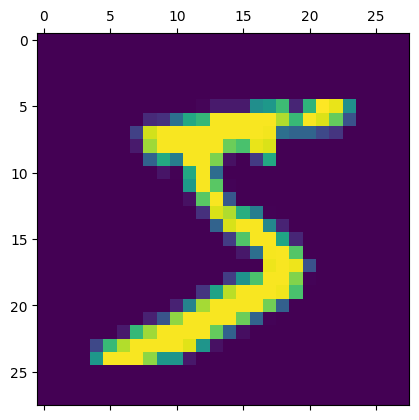

In [7]:
plt.matshow(X_train[0])

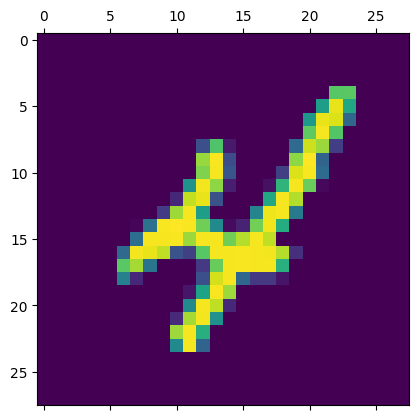

In [8]:
plt.matshow(X_train[9])

In [9]:
y_train[0]

5

In [10]:
y_train[9]

4

In [11]:
# scaling improves accuarcy
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
X_test_flattened.shape

(10000, 784)

In [16]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# No hidden layers

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4703 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3035 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2667 - accuracy: 0.9252


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2707 - accuracy: 0.9259


[0.2707142233848572, 0.9258999824523926]

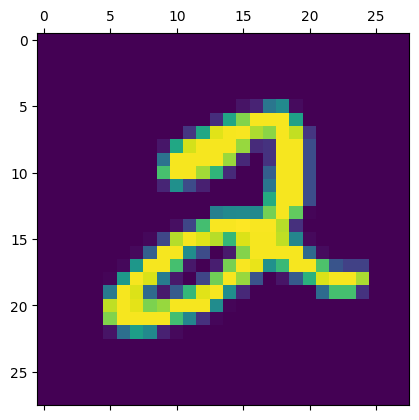

In [20]:
plt.matshow(X_train[5])

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[5]

313/313 [==============================] - 1s 3ms/step


array([8.6793058e-05, 9.9784780e-01, 4.6178052e-01, 4.7205243e-01,
       8.2836160e-03, 2.0448731e-02, 1.1458498e-02, 4.6724102e-01,
       5.6569380e-01, 1.5352391e-01], dtype=float32)

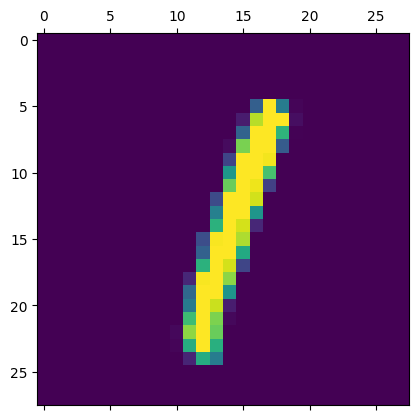

In [22]:
plt.matshow(X_test[5])

In [23]:
#finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[5])

1

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 3ms/step


array([5.3083646e-01, 7.4669030e-03, 9.9929756e-01, 5.0572282e-01,
       7.2058298e-10, 8.8528144e-01, 9.0009356e-01, 1.1070401e-12,
       1.9441958e-01, 2.8624254e-09], dtype=float32)

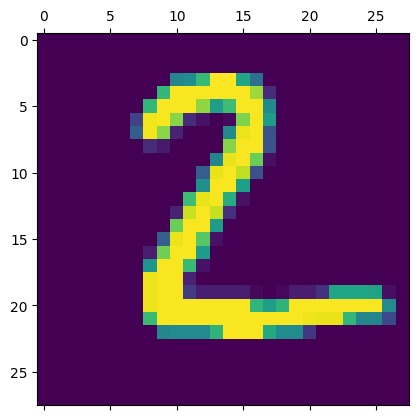

In [25]:
plt.matshow(X_test[1])

In [26]:
np.argmax(y_predicted[1])

2

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [28]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  911,   19,    6,    4,   13,    8,   51,    4],
       [   3,    0,   10,  925,    1,   24,    3,    8,   28,    8],
       [   1,    1,    2,    2,  908,    0,   13,    3,   11,   41],
       [   9,    3,    2,   36,    7,  771,   13,    4,   41,    6],
       [  12,    3,    5,    1,    7,   12,  914,    2,    2,    0],
       [   1,    6,   22,    7,    7,    1,    0,  934,    5,   45],
       [   6,    6,    5,   18,    9,   22,    8,    4,  888,    8],
       [  10,    7,    1,   10,   21,    6,    0,   10,    9,  935]])>

In [32]:
import seaborn as sn


Text(95.72222222222221, 0.5, 'Truth')

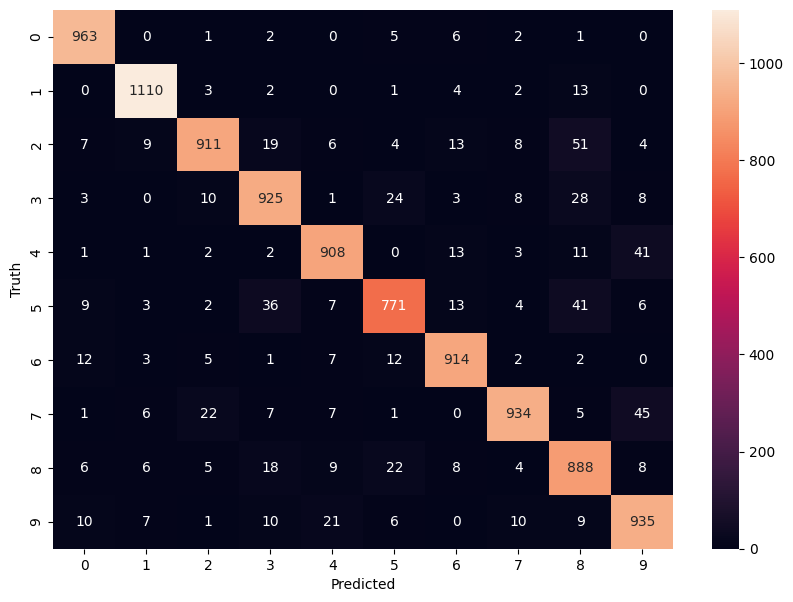

In [33]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2740 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1279 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0882 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0647 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0527 - accuracy: 0.9835


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0746 - accuracy: 0.9760


[0.07462959736585617, 0.9760000109672546]

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

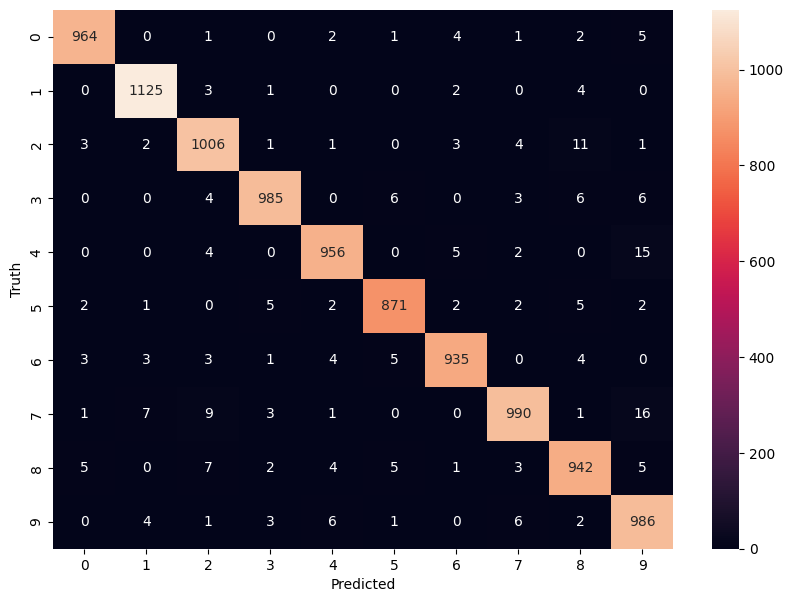

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2682 - accuracy: 0.9238
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1207 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0839 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0654 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0517 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0413 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.02

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0836 - accuracy: 0.9762


[0.08362779021263123, 0.9761999845504761]